In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as ss


In [3]:
NXT = pd.read_csv(r'C:\Users\OgunfowokanPC\Downloads\NXT.L.csv', index_col='Date')
ABF = pd.read_csv(r'C:\Users\OgunfowokanPC\Downloads\ABF.L.csv', index_col='Date') 

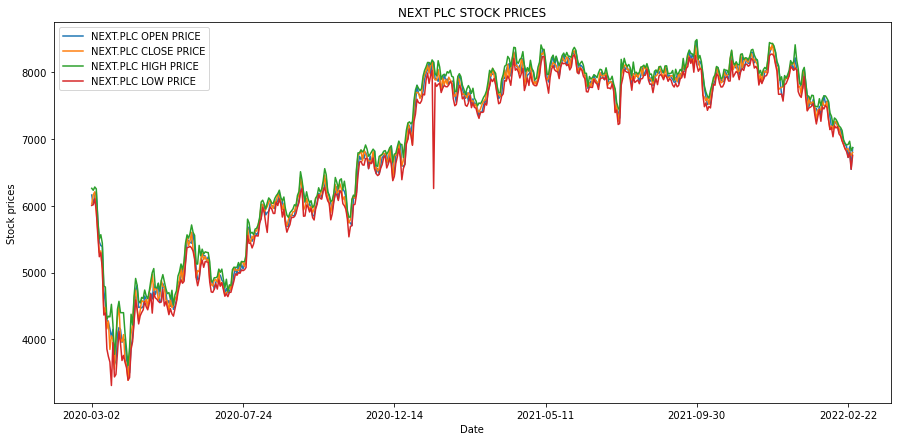

In [82]:
NXT['Open'].plot(label = 'NEXT.PLC OPEN PRICE',figsize=(15,7))
NXT['Close'].plot(label = 'NEXT.PLC CLOSE PRICE')
NXT['High'].plot(label =  'NEXT.PLC HIGH PRICE')
NXT['Low'].plot(label = 'NEXT.PLC LOW PRICE')
plt.legend()
plt.title('NEXT PLC STOCK PRICES')
plt.ylabel('Stock prices')
plt.show()

Text(0.5, 1.0, 'volume traded by NEXT PLC')

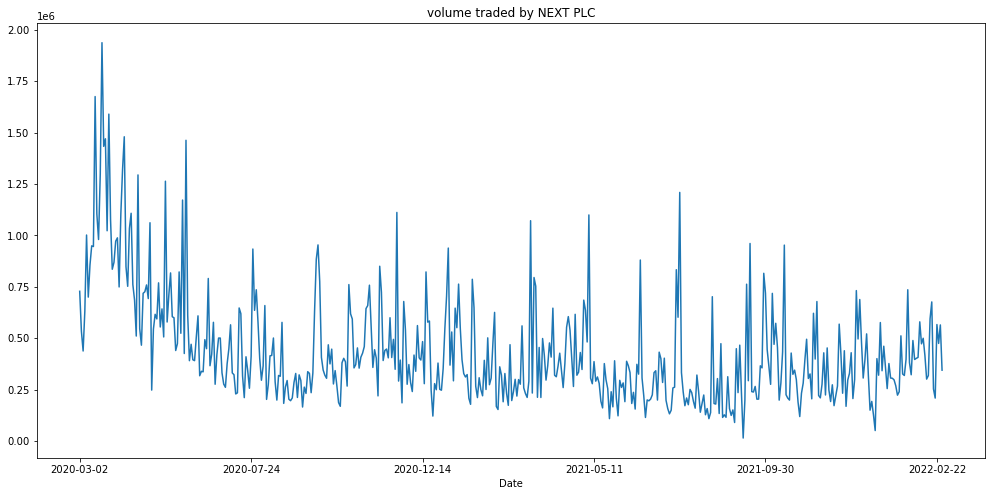

In [85]:
NXT['Volume'].plot(figsize=(17,8))
plt.title('volume traded by NEXT PLC')

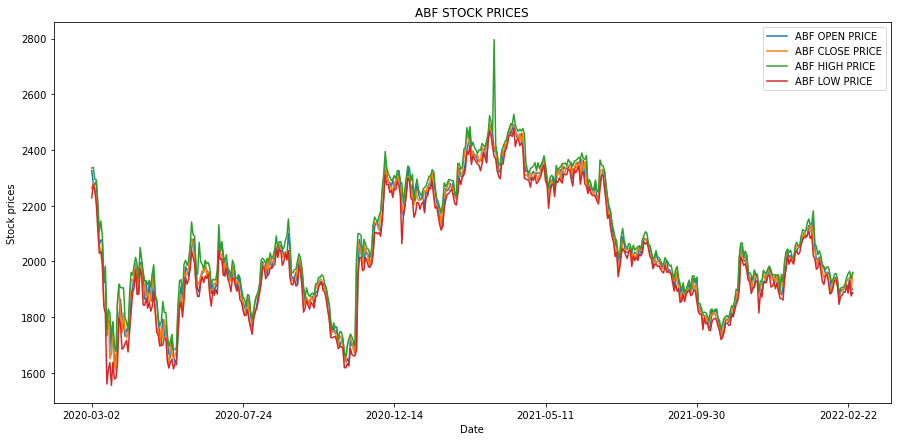

In [83]:
ABF['Open'].plot(label = 'ABF OPEN PRICE',figsize=(15,7))
ABF['Close'].plot(label = 'ABF CLOSE PRICE')
ABF['High'].plot(label =  'ABF HIGH PRICE')
ABF['Low'].plot(label = 'ABF LOW PRICE')
plt.legend()
plt.title('ABF STOCK PRICES')
plt.ylabel('Stock prices')
plt.show()

Text(0.5, 1.0, 'volume traded by ABF PLC')

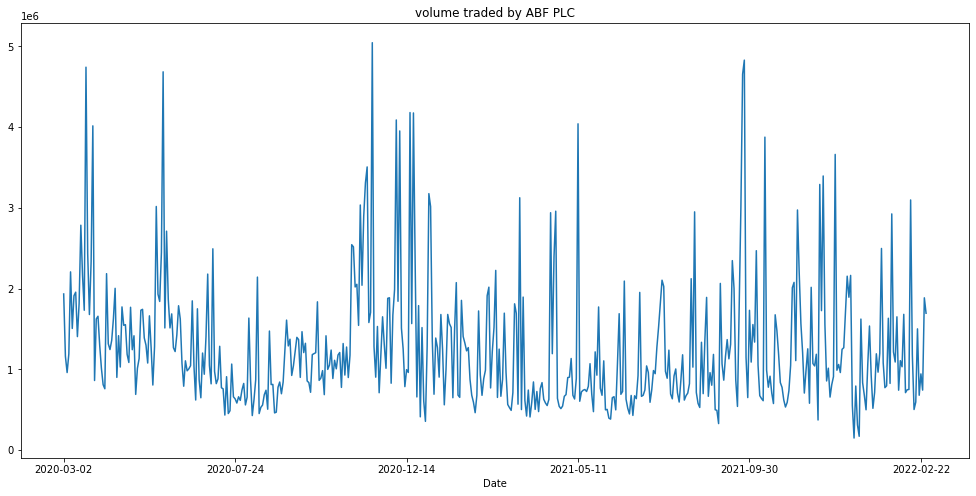

In [86]:
ABF['Volume'].plot(figsize=(17,8))
plt.title('volume traded by ABF PLC')

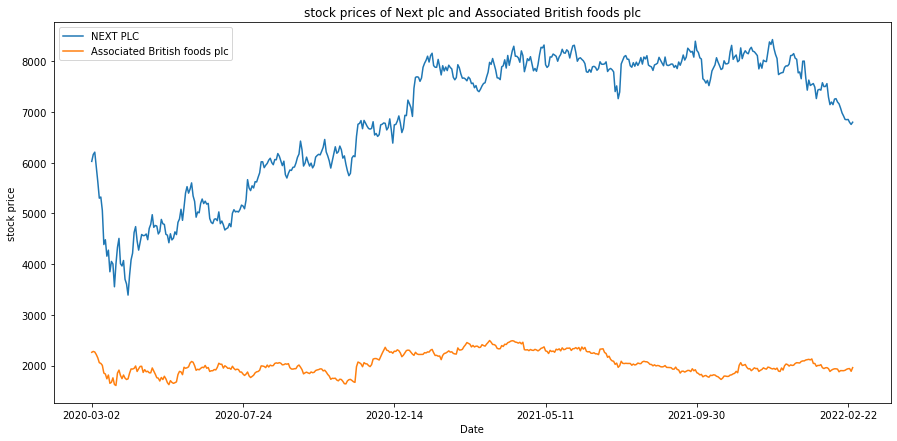

In [87]:
#COMPARISM OF BOTH NEXT PLC AND ABF STOCKS PRICES
NXT['Adj Close'].plot(label='NEXT PLC', figsize=(15,7))
ABF['Adj Close'].plot(label='Associated British foods plc')
plt.ylabel('stock price')
plt.title('stock prices of Next plc and Associated British foods plc')
plt.legend()

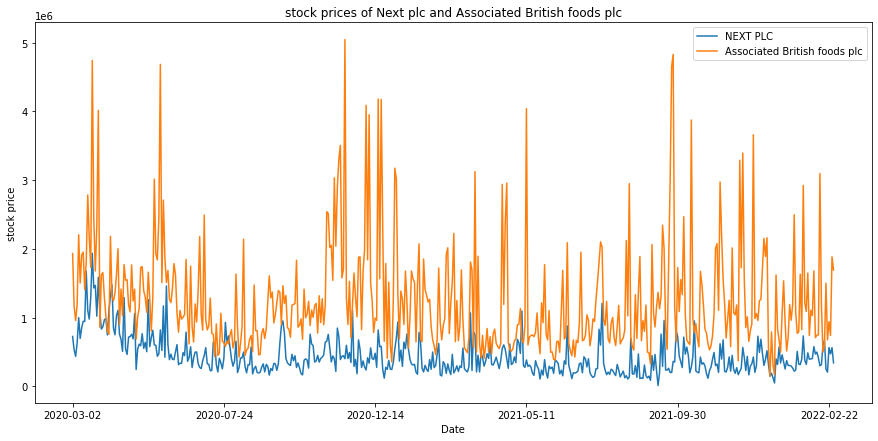

In [88]:
#lets also look at the volume of each company
NXT['Volume'].plot(label='NEXT PLC', figsize=(15,7))
ABF['Volume'].plot(label='Associated British foods plc')
plt.ylabel('stock price')
plt.title('stock prices of Next plc and Associated British foods plc')
plt.legend()
#we can see something interesting in the data here we can see that NEXT had a really huge spike around
#march 2nd 2020 also another at few days before dec 14 2020. to look indept into what happened then 
#we'll look into an article. CNN Bussiness 

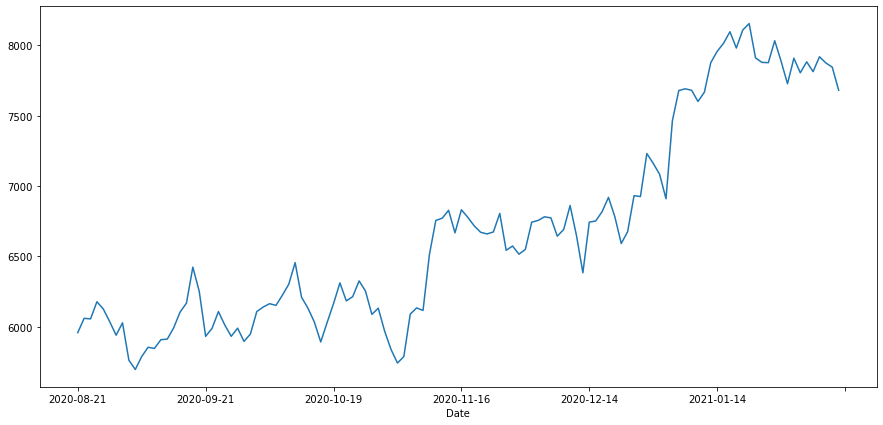

In [90]:
#looking indept into what occured then we tried plotting between 2020-07-24 to 2020-12-14
NXT.iloc[120:240]['Adj Close'].plot(figsize=(15,7))

In [92]:
#sometimes the display of time series stock visualization can be misleading so we take a closer look
#into the market cap to determine if its doing better than its competitor.
#but since our data doesn't give that information we can do a simple calculation to help out
#lets take into consideration this isn't actually the market cap its just a simple calculation
#using open price and volume traded in time for visual representation
NXT['total traded'] = NXT['Open'] * NXT['Volume']
ABF['total traded'] = ABF['Open'] * ABF['Volume']
NXT.head()

,Open,High,Low,Close,Adj Close,Volume,total traded
Date,,,,,,,
2020-03-02,6160.0,6260.0,6004.000000,6026.0,6023.975098,727635,4.482232e+09
2020-03-03,6016.0,6230.0,6016.000000,6162.0,6159.929688,533243,3.207990e+09
2020-03-04,6156.0,6280.0,6102.828125,6208.0,6205.914063,437256,2.691748e+09
2020-03-05,6206.0,6252.0,5918.000000,5918.0,5916.011719,631728,3.920504e+09
2020-03-06,5784.0,5796.0,5564.000000,5626.0,5624.109375,1001324,5.791658e+09


In [93]:
ABF.head()

,Open,High,Low,Close,Adj Close,Volume,total traded
Date,,,,,,,
2020-03-02,2325.0,2335.0000,2228.0,2262.0,2261.775146,1932891,4.493972e+09
2020-03-03,2280.0,2337.0000,2276.0,2279.0,2278.773438,1161026,2.647139e+09
2020-03-04,2276.0,2294.9729,2255.0,2268.0,2267.774414,959652,2.184168e+09
2020-03-05,2286.0,2292.0000,2207.0,2218.0,2217.779541,1190496,2.721474e+09
2020-03-06,2187.0,2216.0000,2114.0,2152.0,2151.786133,2206668,4.825983e+09


Text(0, 0.5, 'Total Traded')

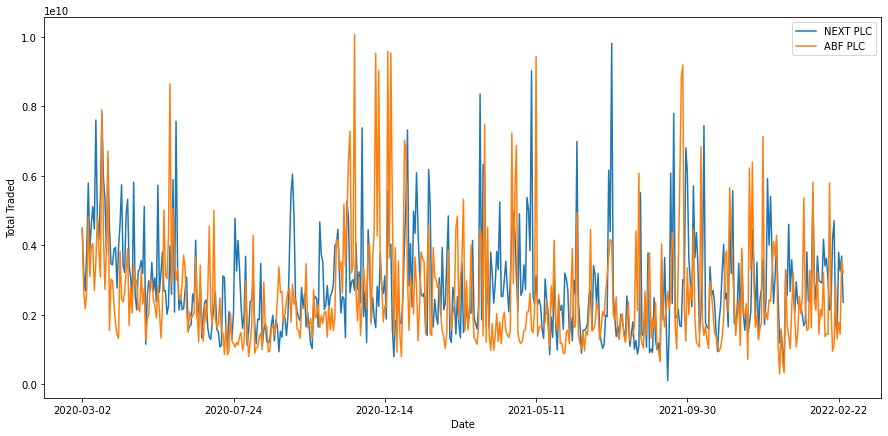

In [98]:
NXT['total traded'].plot(label='NEXT PLC', figsize=(15,7))
ABF['total traded'].plot(label='ABF PLC')
plt.legend()
plt.ylabel('Total Traded')

In [100]:
#checking the position of the maximum traded amount for NEXT plc and compare with ABF
NXT['total traded'].argmax()

350

In [101]:
#there we go it happened on this date
NXT.iloc[[NXT['total traded'].argmax()]]
#we can check CNN bussiness to know what happened on the 2021-07-21

,Open,High,Low,Close,Adj Close,Volume,total traded
Date,,,,,,,
2021-07-21,8118.0,8188.0,7802.0,7946.0,7943.330078,1208598,9.811399e+09


In [107]:
#LETS CORRELATION AND SCATTER MATRIX
from pandas.plotting import scatter_matrix

In [111]:
COR = pd.concat([NXT['Adj Close'], ABF['Adj Close']], axis = 1)
COR.columns = ['NXT Adj Close', 'ABF Adj Close']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212A3F5A880>,
      dtype=object)

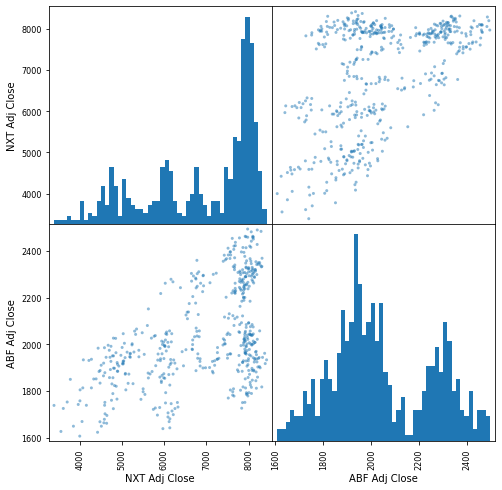

In [117]:
scatter_matrix(COR, figsize=(8,8), hist_kwds={'bins':50})

In [4]:
#DAILY PERCENTAGE CHANGE
NXT['returns'] = (NXT['Close']/NXT['Close'].shift(1))-1

In [5]:
ABF['ABF returns'] = (ABF['Close']/ABF['Close'].shift(1))-1

In [133]:
NXT.head()

,Open,High,Low,Close,Adj Close,Volume,total traded,returns
Date,,,,,,,,
2020-03-02,6160.0,6260.0,6004.000000,6026.0,6023.975098,727635,4.482232e+09,NaN
2020-03-03,6016.0,6230.0,6016.000000,6162.0,6159.929688,533243,3.207990e+09,0.022569
2020-03-04,6156.0,6280.0,6102.828125,6208.0,6205.914063,437256,2.691748e+09,0.007465
2020-03-05,6206.0,6252.0,5918.000000,5918.0,5916.011719,631728,3.920504e+09,-0.046714
2020-03-06,5784.0,5796.0,5564.000000,5626.0,5624.109375,1001324,5.791658e+09,-0.049341


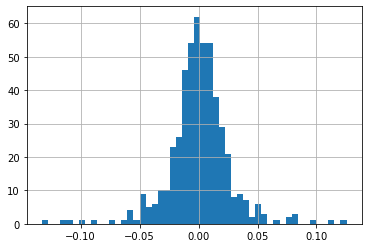

In [135]:
NXT['returns'].hist(bins=50)
#the higher the bell shape the more the variance

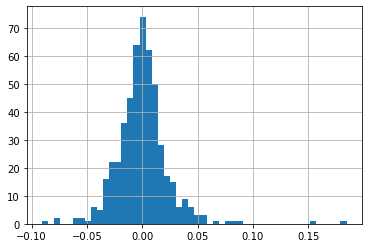

In [137]:
ABF['ABF returns'].hist(bins=50)

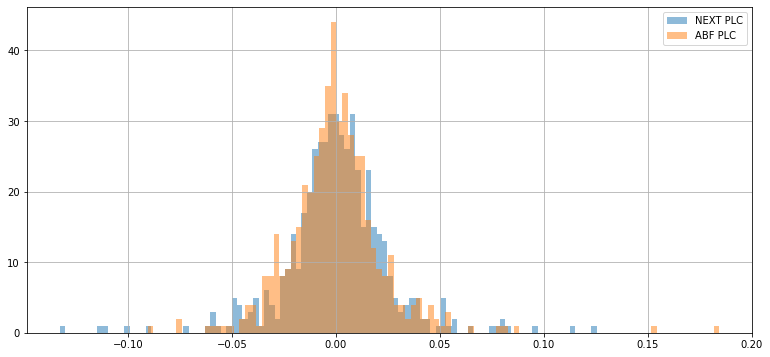

In [140]:
NXT['returns'].hist(bins=100, label='NEXT PLC', alpha=0.5, figsize=(13,6))
ABF['ABF returns'].hist(bins=100, label='ABF PLC', alpha=0.5)
plt.legend()
#from this we can conclude ABF stocks are a little bit more volatile than NEXT stocks. they're
#similar

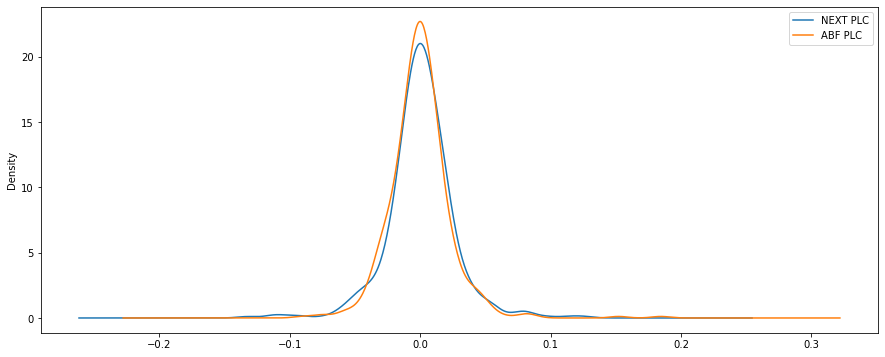

In [142]:
#using the KDE effect
#here we normalized the effects
NXT['returns'].plot(kind='kde', label='NEXT PLC', figsize=(15,6))
ABF['ABF returns'].plot(kind='kde', label='ABF PLC')
plt.legend()

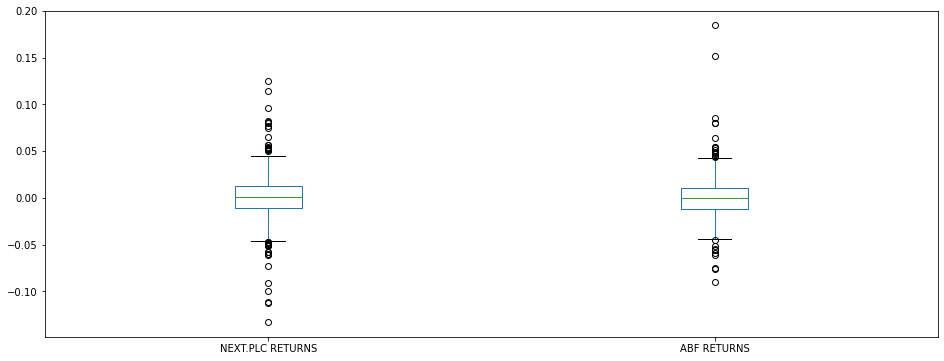

In [145]:
box_data = pd.concat([NXT['returns'], ABF['ABF returns']], axis = 1)
box_data.columns=['NEXT.PLC RETURNS', 'ABF RETURNS']
box_data.plot(kind='box', figsize=(16,6))
#from the graph we can see the daily returns for ABF is well spread out
#so from march 2020 to 2022 ABF seems to be more volatile than NEXT plc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212A9E98130>,
      dtype=object)

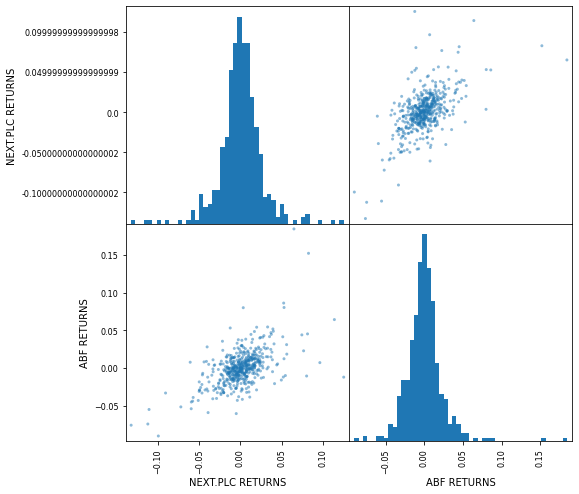

In [152]:
#lets use the returns to answer the question of if their is some correlation in the daily 
#returns of both stocks
scatter_matrix(box_data, figsize=(8,8), hist_kwds={'bins':50}, alpha = 0.5)

CUMULATIVE RETURN

In [156]:
NXT['cumulative return'] = (1 + NXT['returns']).cumprod()
#NXT.head()

In [157]:
NXT.head()

,Open,High,Low,Close,Adj Close,Volume,total traded,returns,cumulative return
Date,,,,,,,,,
2020-03-02,6160.0,6260.0,6004.000000,6026.0,6023.975098,727635,4.482232e+09,NaN,NaN
2020-03-03,6016.0,6230.0,6016.000000,6162.0,6159.929688,533243,3.207990e+09,0.022569,1.022569
2020-03-04,6156.0,6280.0,6102.828125,6208.0,6205.914063,437256,2.691748e+09,0.007465,1.030202
2020-03-05,6206.0,6252.0,5918.000000,5918.0,5916.011719,631728,3.920504e+09,-0.046714,0.982078
2020-03-06,5784.0,5796.0,5564.000000,5626.0,5624.109375,1001324,5.791658e+09,-0.049341,0.933621


In [159]:
ABF['ABF cumulative return'] = (1 + ABF['ABF returns']).cumprod()

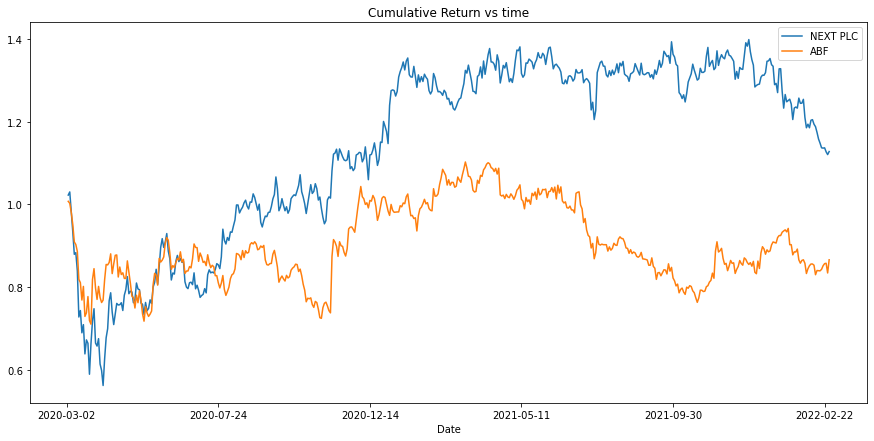

In [162]:
NXT['cumulative return'].plot(label='NEXT PLC', figsize=(15,7))
ABF['ABF cumulative return'].plot(label='ABF')
plt.title('Cumulative Return vs time')
plt.legend()
#looking at the visualization we can say that if we invested 1$ starting from the very first entry
#this answeres the question of which stock shows the highest return on investment for 
#a one dollar investment. 

BUILDING THE REGRESSION MODEL


In [6]:
NXT_ret = NXT.dropna(axis=0)
ABF_ret = ABF.dropna(axis=0)

In [12]:
def lagit(NXT, lags):
    names= []
    for i in range(1, lags +1):
        NXT['Lag_'+str(i)] = NXT['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [13]:
Lagnames = lagit(NXT, 5)

In [15]:
NXT

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2020-03-02,6160.0,6260.0,6004.000000,6026.0,6023.975098,727635,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,6016.0,6230.0,6016.000000,6162.0,6159.929688,533243,0.022569,NaN,NaN,NaN,NaN,NaN
2020-03-04,6156.0,6280.0,6102.828125,6208.0,6205.914063,437256,0.007465,0.022569,NaN,NaN,NaN,NaN
2020-03-05,6206.0,6252.0,5918.000000,5918.0,5916.011719,631728,-0.046714,0.007465,0.022569,NaN,NaN,NaN
2020-03-06,5784.0,5796.0,5564.000000,5626.0,5624.109375,1001324,-0.049341,-0.046714,0.007465,0.022569,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,6882.0,6908.0,6808.000000,6846.0,6846.000000,208301,-0.000584,-0.009829,-0.008598,-0.013571,-0.011735,-0.005004
2022-02-22,6722.0,6916.0,6722.000000,6850.0,6850.000000,565940,0.000584,-0.000584,-0.009829,-0.008598,-0.013571,-0.011735
2022-02-23,6880.0,6964.0,6792.000000,6792.0,6792.000000,474086,-0.008467,0.000584,-0.000584,-0.009829,-0.008598,-0.013571


In [16]:
NXT.dropna(inplace=True)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [20]:
model.fit(NXT[Lagnames], NXT['returns'])

LinearRegression()

In [23]:
NXT['prediction_LR'] = model.predict(NXT[Lagnames])

In [26]:
NXT['direction_LR'] = [1 if i > 0 else -1 for i in NXT.prediction_LR]

In [27]:
NXT['strat_LR'] = NXT['direction_LR'] * NXT['returns']

In [28]:
np.exp(NXT[['returns', 'strat_LR']].sum())

returns     1.511982
strat_LR    1.439629
dtype: float64

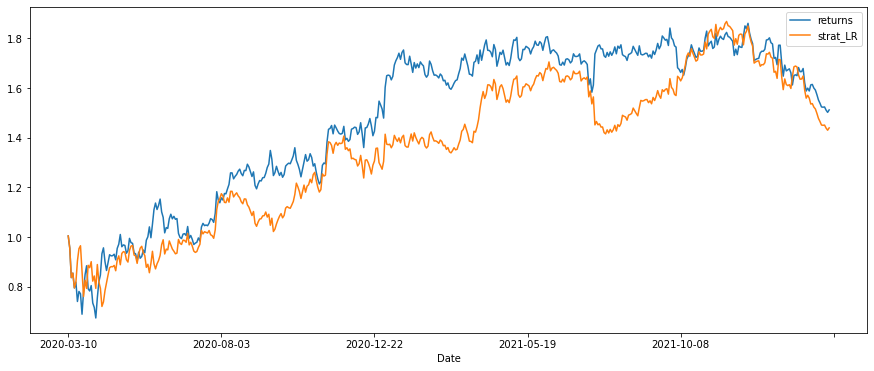

In [30]:
np.exp(NXT[['returns', 'strat_LR']].cumsum()).plot(figsize=(15,6))

In [128]:
NXT.head()

,Open,High,Low,Close,Adj Close,Volume,total traded
Date,,,,,,,
2020-03-02,6160.0,6260.0,6004.000000,6026.0,6023.975098,727635,4.482232e+09
2020-03-03,6016.0,6230.0,6016.000000,6162.0,6159.929688,533243,3.207990e+09
2020-03-04,6156.0,6280.0,6102.828125,6208.0,6205.914063,437256,2.691748e+09
2020-03-05,6206.0,6252.0,5918.000000,5918.0,5916.011719,631728,3.920504e+09
2020-03-06,5784.0,5796.0,5564.000000,5626.0,5624.109375,1001324,5.791658e+09


In [4]:
ABF.count()

Date         504
Open         504
High         504
Low          504
Close        504
Adj Close    504
Volume       504
dtype: int64

In [12]:
#SETTING TRAIN AND TEST FOR NXT
NXTTRAIN=NXT.iloc[0:483]
NXTTRAIN.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
NXTTEST = NXT.iloc[484:504]
NXTTEST.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

,Date,Adj Close
484,2022-01-31,7498.0
485,2022-02-01,7500.0
486,2022-02-02,7556.0
487,2022-02-03,7294.0
488,2022-02-04,7142.0
489,2022-02-07,7194.0
490,2022-02-08,7142.0
491,2022-02-09,7252.0
492,2022-02-10,7260.0
493,2022-02-11,7194.0


In [7]:
#SETTING TRAIN AND TEST FOR ABF
ABFTRAIN=ABF.iloc[0:483]
ABFTRAIN.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
ABFTEST = ABF.iloc[484:504]
ABFTEST.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

,Date,Adj Close
484,2022-01-31,1941.0
485,2022-02-01,1956.0
486,2022-02-02,1959.5
487,2022-02-03,1940.5
488,2022-02-04,1884.5
489,2022-02-07,1910.5
490,2022-02-08,1927.0
491,2022-02-09,1936.5
492,2022-02-10,1936.5
493,2022-02-11,1930.0


In [16]:
NXTTRAIN['Date'] = pd.to_datetime(NXTTRAIN['Date'], infer_datetime_format=True)
INDEXNXTtrain = NXTTRAIN.set_index(['Date'])

NXTTEST['Date'] = pd.to_datetime(NXTTEST['Date'], infer_datetime_format=True)
INDEXNXTTEST = NXTTEST.set_index(['Date'])

ABFTRAIN['Date'] = pd.to_datetime(ABFTRAIN['Date'], infer_datetime_format=True)
INDEXABFTRAIN = ABFTRAIN.set_index(['Date'])

ABFTEST['Date'] = pd.to_datetime(ABFTEST['Date'], infer_datetime_format=True)
INDEXABFTEST = ABFTEST.set_index(['Date'])

<ipython-input-16-e05490ae65c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NXTTRAIN['Date'] = pd.to_datetime(NXTTRAIN['Date'], infer_datetime_format=True)
<ipython-input-16-e05490ae65c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NXTTEST['Date'] = pd.to_datetime(NXTTEST['Date'], infer_datetime_format=True)
<ipython-input-16-e05490ae65c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [14]:
from datetime import datetime
INDEXNXTtrain.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,6160.0,6260.0,6004.000000,6026.0,6023.975098,727635
2020-03-03,6016.0,6230.0,6016.000000,6162.0,6159.929688,533243
2020-03-04,6156.0,6280.0,6102.828125,6208.0,6205.914063,437256
2020-03-05,6206.0,6252.0,5918.000000,5918.0,5916.011719,631728
2020-03-06,5784.0,5796.0,5564.000000,5626.0,5624.109375,1001324


In [31]:
INDEXNXTtrain = INDEXNXTtrain.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
INDEXNXTTEST = INDEXNXTTEST.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
INDEXABFTRAIN = INDEXABFTRAIN.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
INDEXABFTEST = INDEXABFTEST.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

In [28]:
INDEXNXTtrain.head()

,Adj Close
Date,
2020-03-02,6023.975098
2020-03-03,6159.929688
2020-03-04,6205.914063
2020-03-05,5916.011719
2020-03-06,5624.109375


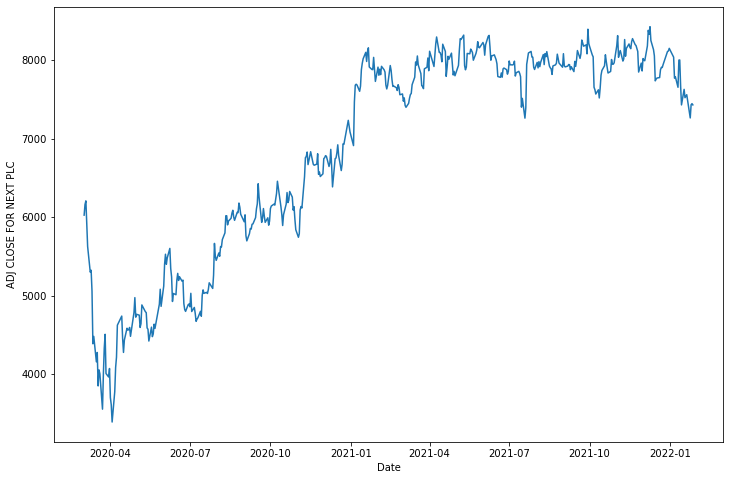

In [29]:
#Plotting the graph for NXT training set
plt.figure(figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('ADJ CLOSE FOR NEXT PLC')
plt.plot(INDEXNXTtrain)

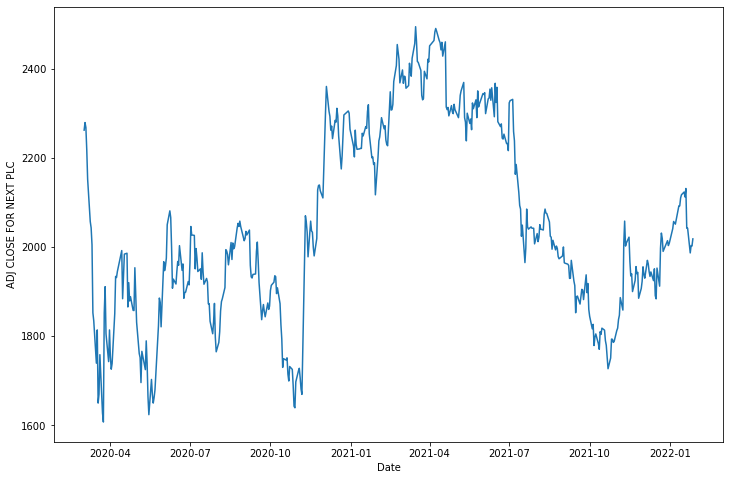

In [32]:
plt.figure(figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('ADJ CLOSE FOR NEXT PLC')
plt.plot(INDEXABFTRAIN)

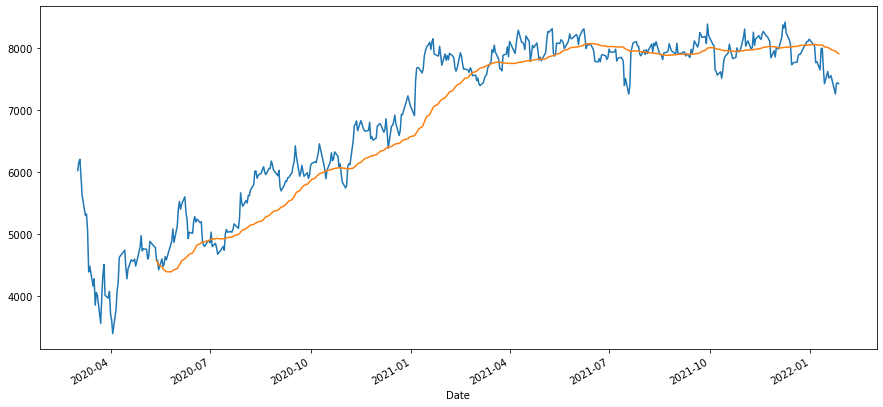

In [102]:
#data might not be reliable looking at short term observation window for time sereis that's where 
#our Moving average comes in. its a way to make the data more reliable and robust against noise
INDEXNXTtrain['Adj Close'].plot(figsize=(15,7))
INDEXNXTtrain['MA50'] = INDEXNXTtrain['Adj Close'].rolling(50).mean()
INDEXNXTtrain['MA50'].plot(label='MA50')

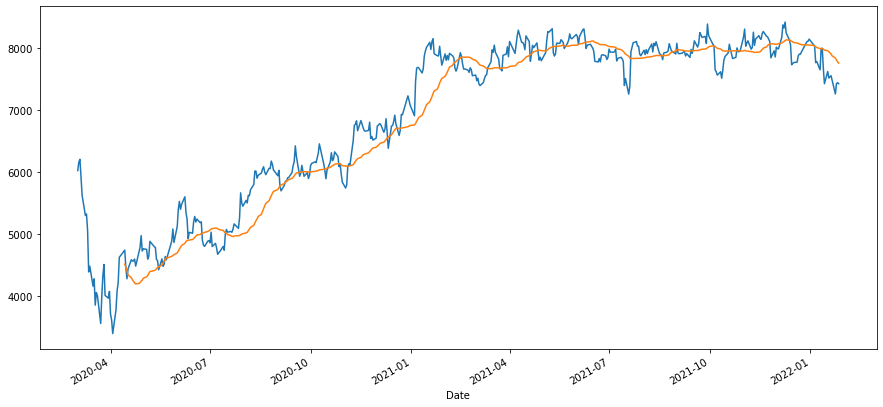

In [103]:
#moving average 30
INDEXNXTtrain['Adj Close'].plot(figsize=(15,7))
INDEXNXTtrain['MA30'] = INDEXNXTtrain['Adj Close'].rolling(30).mean()
INDEXNXTtrain['MA30'].plot(label='MA30')

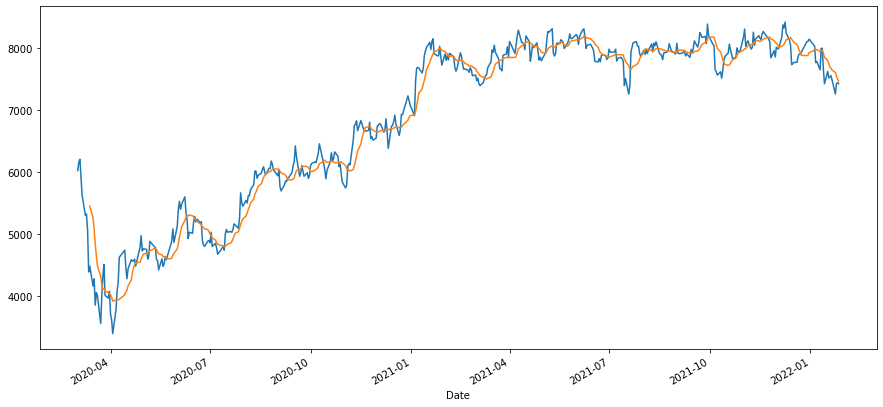

In [104]:
#moving average 30
INDEXNXTtrain['Adj Close'].plot(figsize=(15,7))
INDEXNXTtrain['MA10'] = INDEXNXTtrain['Adj Close'].rolling(10).mean()
INDEXNXTtrain['MA10'].plot(label='MA10')

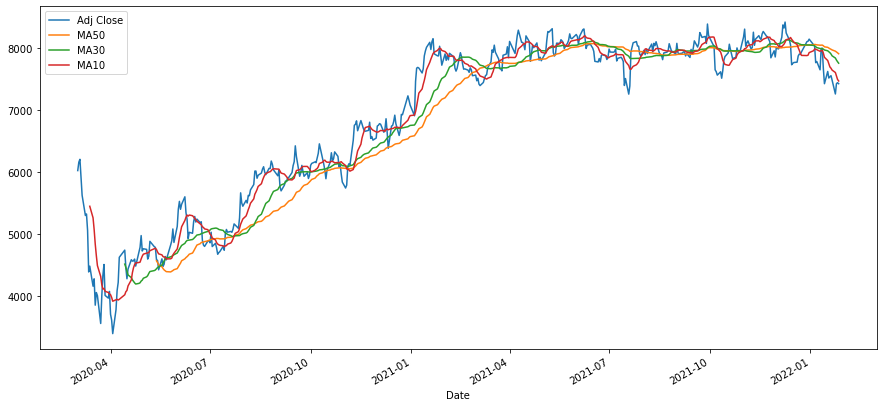

In [106]:
#we would notice when our moving average gets higher we miss out on some trends
#when its too large its not capable of capturing this effects.
INDEXNXTtrain['Adj Close'].plot(figsize=(15,7))
INDEXNXTtrain['MA50'].plot(label='MA50')
INDEXNXTtrain['MA30'].plot(label='MA30')
INDEXNXTtrain['MA10'].plot(label='MA10')
plt.legend()

In [44]:
#looking at the NXT and ABF trend line we can see theres a trend in the data so we'll check for 
#stationarity, looking at the mean and its not constant. which indicates non stationarity
#Determine rolling statistics
NXTrolmean = INDEXNXTtrain.rolling(window=12).mean()#gives us rolling mean at yearly level

NXTstd = INDEXNXTtrain.rolling(window=12).std()
print(NXTrolmean,NXTstd)




              Adj Close
Date                   
2020-03-02          NaN
2020-03-03          NaN
2020-03-04          NaN
2020-03-05          NaN
2020-03-06          NaN
...                 ...
2022-01-21  7669.679850
2022-01-24  7627.475993
2022-01-25  7597.772461
2022-01-26  7580.400024
2022-01-27  7532.866659

[483 rows x 1 columns]              Adj Close
Date                  
2020-03-02         NaN
2020-03-03         NaN
2020-03-04         NaN
2020-03-05         NaN
2020-03-06         NaN
...                ...
2022-01-21  187.537029
2022-01-24  217.829286
2022-01-25  218.483291
2022-01-26  221.998576
2022-01-27  181.785452

[483 rows x 1 columns]


In [34]:
#looking at the NXT and ABF trend line we can see theres a trend in the data so we'll check for 
#stationarity, looking at the mean and its not constant. which indicates non stationarity
#Determine rolling statistics
ABFrolmean = INDEXABFTRAIN.rolling(window=12).mean()#gives us rolling mean at yearly level

ABFstd = INDEXABFTRAIN.rolling(window=12).std()
print(ABFrolmean,ABFstd)


              Adj Close
Date                   
2020-03-02          NaN
2020-03-03          NaN
2020-03-04          NaN
2020-03-05          NaN
2020-03-06          NaN
...                 ...
2022-01-21  2087.250000
2022-01-24  2081.625000
2022-01-25  2077.625000
2022-01-26  2071.041667
2022-01-27  2064.875000

[483 rows x 1 columns]             Adj Close
Date                 
2020-03-02        NaN
2020-03-03        NaN
2020-03-04        NaN
2020-03-05        NaN
2020-03-06        NaN
...               ...
2022-01-21  32.761188
2022-01-24  43.139902
2022-01-25  48.169740
2022-01-26  52.838716
2022-01-27  54.463551

[483 rows x 1 columns]


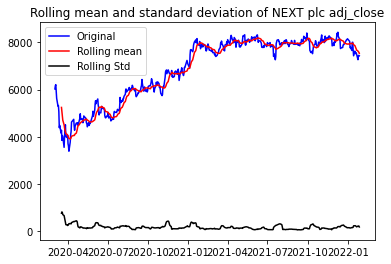

In [47]:
#plotting the rolling statistics for NEXT PLC
orig_NXT = plt.plot(INDEXNXTtrain, color='blue', label='Original')
mean_NXT = plt.plot(NXTrolmean, color='red', label='Rolling mean')
std_NXT  = plt.plot(NXTstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation of NEXT plc adj_close')
plt.show(block=False)

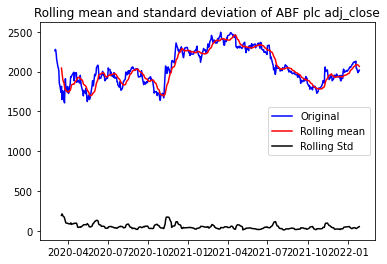

In [48]:
orig_ABF = plt.plot(INDEXABFTRAIN, color='blue', label='Original')
mean_ABF = plt.plot(ABFrolmean, color='red', label='Rolling mean')
std_ABF  = plt.plot(ABFstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation of ABF plc adj_close')
plt.show(block=False)

In [51]:
#dicky-fuller test;
from statsmodels.tsa.stattools import adfuller
print(' Results of Dickey-fuller Test:')
dftestNXT = adfuller(INDEXNXTtrain['Adj Close'], autolag='AIC')

dfoutputNXT = pd.Series(dftestNXT[0:4], index=['Test Statistic', 'P-value', '#lags used', ' Number of observations used'])
for key,value in dftestNXT[4].items():
    dfoutputNXT['Critical Value (%s)'%key] = value
    
print(dfoutputNXT)
    

 Results of Dickey-fuller Test:
Test Statistic                   -1.343390
P-value                           0.609095
#lags used                        5.000000
 Number of observations used    477.000000
Critical Value (1%)              -3.444134
Critical Value (5%)              -2.867618
Critical Value (10%)             -2.570008
dtype: float64


In [52]:
#dicky-fuller test FOR ABF.L;
from statsmodels.tsa.stattools import adfuller
print(' Results of Dickey-fuller Test:')
dftestABF = adfuller(INDEXABFTRAIN['Adj Close'], autolag='AIC')

dfoutputABF = pd.Series(dftestABF[0:4], index=['Test Statistic', 'P-value', '#lags used', ' Number of observations used'])
for key,value in dftestNXT[4].items():
    dfoutputABF['Critical Value (%s)'%key] = value
    
print(dfoutputABF)
    

 Results of Dickey-fuller Test:
Test Statistic                   -2.335415
P-value                           0.160800
#lags used                        4.000000
 Number of observations used    478.000000
Critical Value (1%)              -3.444134
Critical Value (5%)              -2.867618
Critical Value (10%)             -2.570008
dtype: float64


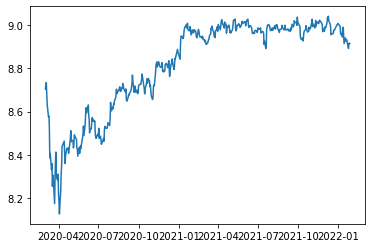

In [66]:
#Estimating the trend for NEXT
INDEXNXTtrain_logscale = np.log(INDEXNXTtrain)
plt.plot(INDEXNXTtrain_logscale)

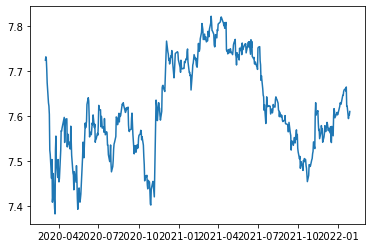

In [54]:
INDEXABFTRAIN_logscale = np.log(INDEXABFTRAIN)
plt.plot(INDEXABFTRAIN_logscale)

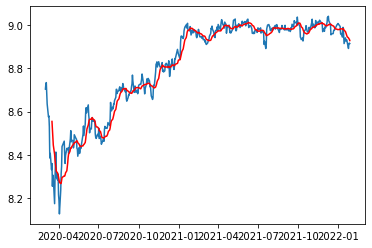

In [55]:
movingaverageNXT = INDEXNXTtrain_logscale.rolling(window=12).mean()
MovingSTD = INDEXNXTtrain_logscale.rolling(window=12).std()
plt.plot(INDEXNXTtrain_logscale)
plt.plot(movingaverageNXT, color='red')

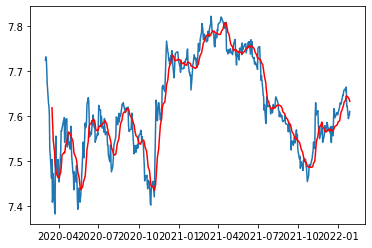

In [56]:
movingaverageABF = INDEXABFTRAIN_logscale.rolling(window=12).mean()
MovingSTDabf = INDEXABFTRAIN_logscale.rolling(window=12).std()
plt.plot(INDEXABFTRAIN_logscale)
plt.plot(movingaverageABF, color='red')

In [58]:
INDEXNXTtrain_logscale_moingaverage = INDEXNXTtrain_logscale - movingaverageNXT
INDEXNXTtrain_logscale_moingaverage.head()

#removing NAN values
INDEXNXTtrain_logscale_moingaverage.dropna(inplace=True)
INDEXNXTtrain_logscale_moingaverage.head(10)

,Adj Close
Date,
2020-03-17,-0.193893
2020-03-18,-0.261503
2020-03-19,-0.174981
2020-03-20,-0.150846
2020-03-23,-0.227572
2020-03-24,-0.080926
2020-03-25,0.015404
2020-03-26,0.069323
2020-03-27,-0.028848


In [60]:
INDEXABFTRAIN_logscale_moingaverage = INDEXABFTRAIN_logscale - movingaverageABF
INDEXABFTRAIN_logscale_moingaverage.head()

#removing NAN values
INDEXABFTRAIN_logscale_moingaverage.dropna(inplace=True)
INDEXABFTRAIN_logscale_moingaverage.head(10)

,Adj Close
Date,
2020-03-17,-0.114936
2020-03-18,-0.183405
2020-03-19,-0.145447
2020-03-20,-0.072607
2020-03-23,-0.124226
2020-03-24,-0.112281
2020-03-25,0.038053
2020-03-26,0.074980
2020-03-27,0.026925


In [63]:
def test_stationarity(timeseries):
    
    #determining rolling statistics
    movingaverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean =plt.plot(movingaverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
             

             
             


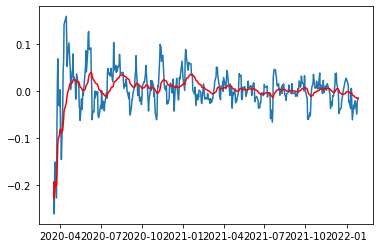

In [61]:
#to see the trends present in the data of NXT.PLC
exponentialdecayweightedaverage = INDEXNXTtrain_logscale_moingaverage.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(INDEXNXTtrain_logscale_moingaverage)
plt.plot(exponentialdecayweightedaverage, color='red')